In [1]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI_Mumbai.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Mumbai_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.tail()

,Date,NO2,O3,PM2.5,PM10,SO2,RH,WD,WS,AQI5,AQI4,AQI3,AQI2,AQI1,DOW,DOM,DOY,MONTH,AQI
1216,06/04/2018,65.04,63.89,32.44,86.12,22.45,73.01,144.96,0.29,118.546897,78.289231,81.116154,81.060000,86.120000,5,6,96,4,98.065128
1217,07/04/2018,78.46,59.64,36.35,97.21,25.26,69.78,165.87,0.15,78.289231,81.116154,81.060000,86.120000,98.065128,6,7,97,4,103.970000
1218,08/04/2018,83.97,52.59,36.15,92.84,25.54,69.87,119.44,0.26,81.116154,81.060000,86.120000,98.065128,103.970000,7,8,98,4,122.640000
1219,09/04/2018,102.64,53.93,33.45,86.65,26.00,71.02,205.65,0.22,81.060000,86.120000,98.065128,103.970000,122.640000,1,9,99,4,126.290000
1220,10/04/2018,106.29,74.84,41.33,102.98,26.46,63.91,100.48,0.22,86.120000,98.065128,103.970000,122.640000,126.290000,2,10,100,4,98.280000


In [2]:
#create a dataframe with all training data
train_X = train_df.drop(columns=['AQI', 'Date', 'SO2', 'NO2', 'O3'])
test_X = test_df.drop(columns=['AQI', 'Date', 'SO2', 'NO2', 'O3'])
# train_X = train_df.drop(columns=['AQI', 'Date'])
# test_X = test_df.drop(columns=['AQI', 'Date'])
#check that the variables has been removed
train_X.head() 


,PM2.5,PM10,RH,WD,WS,AQI5,AQI4,AQI3,AQI2,AQI1,DOW,DOM,DOY,MONTH
0,75.40,173.80,70.12,140.56,0.38,143.676309,155.396846,148.407047,151.935168,150.158621,7,7,341,12
1,71.63,155.24,99.88,150.76,0.22,155.396846,148.407047,151.935168,150.158621,137.288621,1,8,342,12
2,75.08,164.03,90.86,127.07,0.32,148.407047,151.935168,150.158621,137.288621,149.066207,2,9,343,12
3,86.68,200.99,89.55,153.23,0.19,151.935168,150.158621,137.288621,149.066207,188.666207,3,10,344,12
4,99.88,205.55,73.62,113.71,0.22,150.158621,137.288621,149.066207,188.666207,268.170000,4,11,345,12


In [3]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]

#view dataframe
train_y.tail()

,AQI
1216,98.065128
1217,103.970000
1218,122.640000
1219,126.290000
1220,98.280000


In [4]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

Using TensorFlow backend.
W0820 01:42:43.008679 140456276653888 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 01:42:43.022725 140456276653888 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 01:42:43.024736 140456276653888 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

W0820 01:42:43.483257 140456276653888 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

W0820 01:42:44.591247 140456276653888 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0820 01:42:44.669164 140456276653888 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
1221/1221 [==============================] - 0s 206us/step - loss: 3238.4974
Epoch 2/300
1221/1221 [==============================] - 0s 32us/step - loss: 2376.7718
Epoch 3/300
1221/1221 [==============================] - 0s 30us/step - loss: 2230.0729
Epoch 4/300
1221/1221 [==============================] - 0s 36us/step - loss: 2223.3941
Epoch 5/300
1221/1221 [==============================] - 0s 30us/step - loss: 2166.2330
Epoch 6/300
1221/1221 [==============================] - 0s 33us/step - loss: 2148.0935
Epoch 7/300
  32/1221 [..............................] - ETA: 0s - loss: 1431.7133

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1221/1221 [==============================] - 0s 33us/step - loss: 2125.9842
Epoch 8/300
1221/1221 [==============================] - ETA: 0s - loss: 2259.74 - 0s 32us/step - loss: 2126.3744
Epoch 9/300
1221/1221 [==============================] - 0s 30us/step - loss: 2098.8645
Epoch 10/300
1221/1221 [==============================] - 0s 28us/step - loss: 2103.3101
Epoch 11/300
1221/1221 [==============================] - 0s 30us/step - loss: 2081.0817
Epoch 12/300
1221/1221 [==============================] - 0s 32us/step - loss: 2094.4585
Epoch 13/300
1221/1221 [==============================] - 0s 32us/step - loss: 2083.5664
Epoch 14/300
1221/1221 [==============================] - 0s 32us/step - loss: 2072.8391
Epoch 15/300
1221/1221 [==============================] - 0s 30us/step - loss: 2043.3974
Epoch 16/300
1221/1221 [==============================] - 0s 31us/step - loss: 2128.3391
Epoch 17/300
1221/1221 [==============================] - 0s 31us/step - loss: 2055.3785
Epoch 18/3

Epoch 99/300
1221/1221 [==============================] - 0s 30us/step - loss: 1849.0980
Epoch 100/300
1221/1221 [==============================] - 0s 26us/step - loss: 1830.2351
Epoch 101/300
1221/1221 [==============================] - 0s 30us/step - loss: 1818.4172
Epoch 102/300
1221/1221 [==============================] - 0s 29us/step - loss: 1845.1440
Epoch 103/300
1221/1221 [==============================] - 0s 27us/step - loss: 1825.8358
Epoch 104/300
1221/1221 [==============================] - 0s 27us/step - loss: 1826.1331
Epoch 105/300
1221/1221 [==============================] - 0s 25us/step - loss: 1830.8098
Epoch 106/300
1221/1221 [==============================] - 0s 30us/step - loss: 1820.1758
Epoch 107/300
1221/1221 [==============================] - 0s 28us/step - loss: 1823.7081
Epoch 108/300
1221/1221 [==============================] - 0s 26us/step - loss: 1822.0812
Epoch 109/300
1221/1221 [==============================] - 0s 28us/step - loss: 1831.5351
Epoch 110/3

1221/1221 [==============================] - 0s 30us/step - loss: 1760.2024
Epoch 191/300
1221/1221 [==============================] - 0s 28us/step - loss: 1753.9714
Epoch 192/300
1221/1221 [==============================] - 0s 27us/step - loss: 1800.0247
Epoch 193/300
1221/1221 [==============================] - 0s 29us/step - loss: 1750.8490
Epoch 194/300
1221/1221 [==============================] - 0s 29us/step - loss: 1739.5893
Epoch 195/300
1221/1221 [==============================] - 0s 33us/step - loss: 1748.5074
Epoch 196/300
1221/1221 [==============================] - 0s 28us/step - loss: 1739.3300
Epoch 197/300
1221/1221 [==============================] - 0s 27us/step - loss: 1741.4108
Epoch 198/300
1221/1221 [==============================] - 0s 29us/step - loss: 1741.3338
Epoch 199/300
1221/1221 [==============================] - 0s 27us/step - loss: 1748.3269
Epoch 200/300
1221/1221 [==============================] - 0s 28us/step - loss: 1736.1573
Epoch 201/300
1221/1221 

1221/1221 [==============================] - 0s 53us/step - loss: 1661.0721
Epoch 282/300
1221/1221 [==============================] - 0s 38us/step - loss: 1666.9864
Epoch 283/300
1221/1221 [==============================] - 0s 42us/step - loss: 1666.4576
Epoch 284/300
1221/1221 [==============================] - 0s 29us/step - loss: 1672.0591
Epoch 285/300
1221/1221 [==============================] - 0s 32us/step - loss: 1662.2146
Epoch 286/300
1221/1221 [==============================] - 0s 27us/step - loss: 1669.2463
Epoch 287/300
1221/1221 [==============================] - 0s 30us/step - loss: 1663.2566
Epoch 288/300
1221/1221 [==============================] - 0s 29us/step - loss: 1665.6895
Epoch 289/300
1221/1221 [==============================] - 0s 29us/step - loss: 1662.1140
Epoch 290/300
1221/1221 [==============================] - 0s 33us/step - loss: 1654.0725
Epoch 291/300
1221/1221 [==============================] - 0s 50us/step - loss: 1691.4538
Epoch 292/300
1221/1221 

In [7]:
#make predictions on unseen data
test_y_predictions = model.predict(test_X)

In [8]:
l = []
print("Required Value \t \t Predicted Value \t Difference")
for i in range(10):
    l.append(test_y["AQI"][i] - test_y_predictions[i])
    print(str(round(test_y["AQI"][i],2)) +"\t\t\t" + str(test_y_predictions[i]) + "\t\t" + str(l[i]))

Required Value 	 	 Predicted Value 	 Difference
97.66			[112.74885]		[-15.08577]
85.59			[112.20312]		[-26.613121]
76.99			[103.14785]		[-26.157852]
79.87			[88.42089]		[-8.550888]
81.21			[93.28005]		[-12.070053]
88.32			[86.32035]		[1.999649]
93.77			[99.15768]		[-5.38768]
75.47			[108.34783]		[-32.87783]
105.43			[89.26507]		[16.16668]
91.68			[127.39576]		[-35.713196]


In [9]:
l.sort(reverse = True) 
print(l)

[array([16.16668], dtype=float32), array([1.999649], dtype=float32), array([-5.38768], dtype=float32), array([-8.550888], dtype=float32), array([-12.070053], dtype=float32), array([-15.08577], dtype=float32), array([-26.157852], dtype=float32), array([-26.613121], dtype=float32), array([-32.87783], dtype=float32), array([-35.713196], dtype=float32)]


In [10]:
#input layer weights
weights, biases = model.layers[0].get_weights()
print(weights)

[[ 7.6513268e-02  5.3318352e-01  3.5671398e-01  2.5053728e-01
   1.9875069e-01  2.4373591e-01  6.6189331e-01  3.9960191e-01
  -5.6841232e-02 -3.8864903e-02]
 [ 2.8480926e-01  1.4251056e-03  9.9603832e-02 -1.9887768e-01
  -2.8927681e-01 -3.4904635e-01 -5.5135423e-01  2.7795750e-01
   4.9873453e-01 -3.9480129e-01]
 [ 2.5004977e-01  2.7540299e-01  1.7799237e-01  8.7400667e-02
   4.3040801e-02 -3.9834929e-01 -2.3856306e-01 -6.4907837e-01
   3.7155378e-01 -5.4676056e-01]
 [-4.3573070e-01  4.1987713e-02  2.7093616e-01  3.2983360e-01
  -7.7374391e-02 -1.6838467e-01  5.3426474e-03 -5.3200025e-02
  -1.0530169e-01 -5.8520138e-02]
 [-1.6193748e-01 -3.1721103e-03 -7.3110950e-01 -3.4913480e-01
  -1.2094302e-03 -4.6294403e-01 -3.4151334e-01 -2.0584214e+00
  -4.1092426e-01  2.8460425e-01]
 [ 5.5583215e-01  4.0166974e-01  1.0572495e-01  3.4519327e-01
   3.7808816e-03 -3.9710414e-01 -2.1031807e-01 -5.8395851e-01
  -2.4194507e-01  4.4545320e-01]
 [ 3.3281660e-01  4.9720579e-01  3.7621489e-01 -5.8653873e

In [11]:
#hidden layer weights
weights, biases = model.layers[1].get_weights()
print(weights)

[[ 0.19641872  0.46952283  0.22146687  0.6075133  -1.074253    0.3240679
   0.10906038 -1.0601839  -0.650651   -0.1006091 ]
 [-0.3179455   0.23785175 -0.3264463   0.04245001  0.29352075 -0.19187288
  -0.23006336 -0.03127579  0.2150334   0.5215321 ]
 [ 0.4833111   0.32226175  0.24791089  0.49902055  0.24649316  0.56229615
   0.25978902  0.1488909  -0.16871296  0.48268387]
 [-0.4715525  -0.09763765 -0.7988443   0.07571684  0.07705818  0.38486272
   0.09789135  0.38764605  0.1699119  -0.48143885]
 [ 0.28475246  0.05117417  0.4519843  -0.47550672 -0.37075764 -0.20758086
   0.198484    0.0685895  -0.5316796  -0.10904544]
 [ 0.09714061 -0.33654982 -0.07355404 -0.41572434  0.48035836  0.23807895
  -0.24535775 -0.07151154  0.44848895 -0.3554979 ]
 [-0.1211387  -0.24233076 -0.20768598 -0.50900286  1.1700346  -0.31969288
   0.14746913 -1.8407454  -0.16005279 -0.13830173]
 [-0.04610173 -0.15707086  0.3158774  -0.31179202  0.4289572  -0.7170129
   0.40078613 -0.5185139  -1.3124644   0.21256706]
 [

In [12]:
#output layer weights
weights, biases = model.layers[2].get_weights()
print(weights)

[[ 0.74622095]
 [ 0.36224496]
 [ 0.23770411]
 [-0.7076082 ]
 [-0.39707112]
 [ 0.37053195]
 [-0.31930214]
 [ 1.102021  ]
 [-0.82234484]
 [ 0.48684117]]


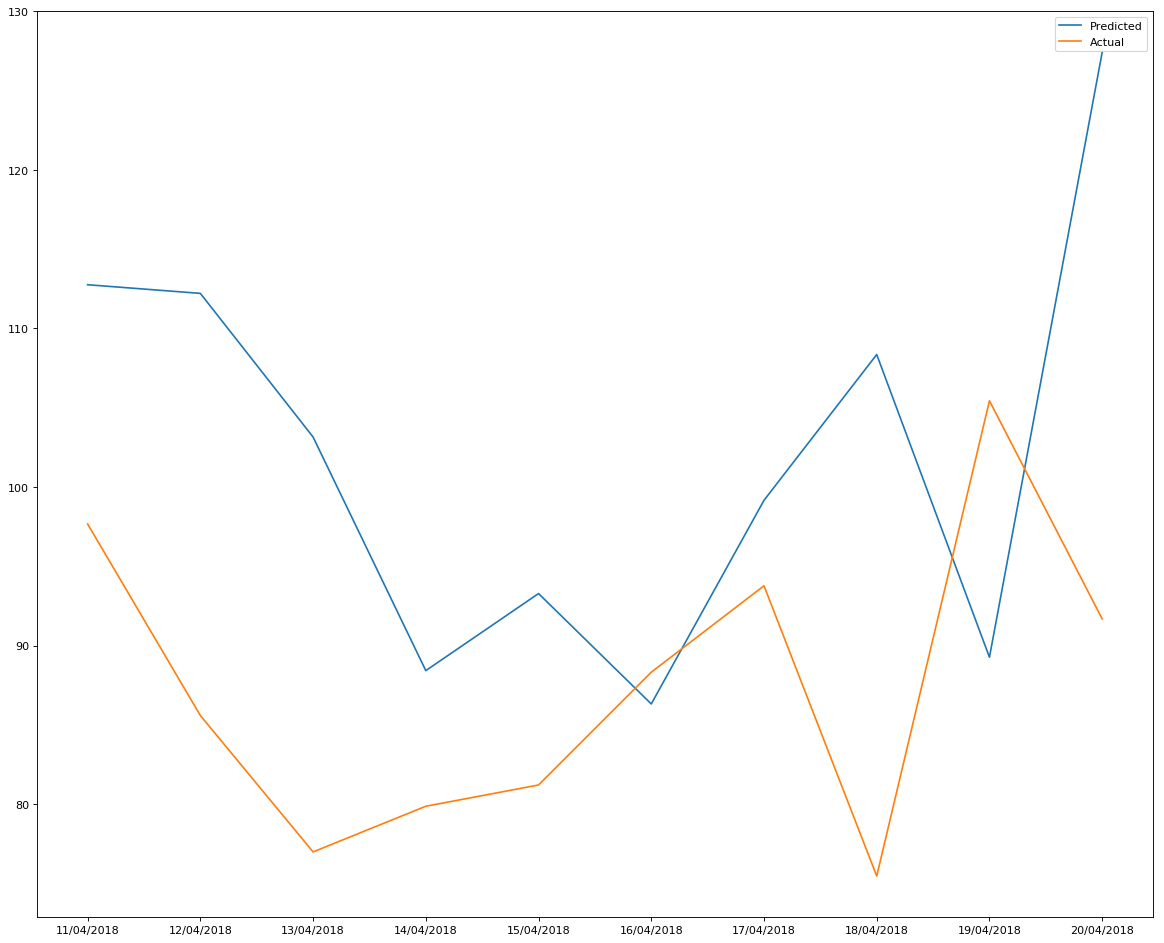

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [15]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(20, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(20, activation='relu'))
model_mc.add(Dense(20, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1221/1221 [==============================] - 0s 264us/step - loss: 6381.9390
Epoch 2/300
1221/1221 [==============================] - 0s 36us/step - loss: 2814.8728
Epoch 3/300
1221/1221 [==============================] - 0s 38us/step - loss: 2482.5000
Epoch 4/300
1221/1221 [==============================] - 0s 34us/step - loss: 2322.7125
Epoch 5/300
1221/1221 [==============================] - 0s 35us/step - loss: 2238.9588
Epoch 6/300
  32/1221 [..............................] - ETA: 0s - loss: 1026.7192

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1221/1221 [==============================] - 0s 39us/step - loss: 2229.4334
Epoch 7/300
1221/1221 [==============================] - 0s 33us/step - loss: 2137.1084
Epoch 8/300
1221/1221 [==============================] - 0s 33us/step - loss: 2089.0987
Epoch 9/300
1221/1221 [==============================] - 0s 31us/step - loss: 2112.6194
Epoch 10/300
1221/1221 [==============================] - 0s 32us/step - loss: 2059.1780
Epoch 11/300
1221/1221 [==============================] - 0s 35us/step - loss: 2012.7147
Epoch 12/300
1221/1221 [==============================] - 0s 36us/step - loss: 2024.4976
Epoch 13/300
1221/1221 [==============================] - 0s 36us/step - loss: 1987.2690
Epoch 14/300
1221/1221 [==============================] - 0s 34us/step - loss: 1995.9422
Epoch 15/300
1221/1221 [==============================] - 0s 32us/step - loss: 1972.4325
Epoch 16/300
1221/1221 [==============================] - 0s 34us/step - loss: 1997.2790
Epoch 17/300
1221/1221 [=============

1221/1221 [==============================] - 0s 59us/step - loss: 1590.4388
Epoch 99/300
1221/1221 [==============================] - 0s 61us/step - loss: 1588.8158
Epoch 100/300
1221/1221 [==============================] - 0s 43us/step - loss: 1575.8860
Epoch 101/300
1221/1221 [==============================] - 0s 53us/step - loss: 1601.0551
Epoch 102/300
1221/1221 [==============================] - 0s 53us/step - loss: 1546.7104
Epoch 103/300
1221/1221 [==============================] - 0s 30us/step - loss: 1553.2604
Epoch 104/300
1221/1221 [==============================] - 0s 26us/step - loss: 1547.6744
Epoch 105/300
1221/1221 [==============================] - 0s 33us/step - loss: 1610.8952
Epoch 106/300
1221/1221 [==============================] - 0s 36us/step - loss: 1575.7200
Epoch 107/300
1221/1221 [==============================] - 0s 37us/step - loss: 1549.5205
Epoch 108/300
1221/1221 [==============================] - 0s 36us/step - loss: 1593.3165
Epoch 109/300
1221/1221 [

1221/1221 [==============================] - 0s 41us/step - loss: 1288.2142
Epoch 190/300
1221/1221 [==============================] - 0s 38us/step - loss: 1296.1685
Epoch 191/300
1221/1221 [==============================] - 0s 36us/step - loss: 1296.8850
Epoch 192/300
1221/1221 [==============================] - 0s 49us/step - loss: 1300.0438
Epoch 193/300
1221/1221 [==============================] - 0s 55us/step - loss: 1301.4254
Epoch 194/300
1221/1221 [==============================] - 0s 42us/step - loss: 1370.4049
Epoch 195/300
1221/1221 [==============================] - 0s 45us/step - loss: 1288.5145
Epoch 196/300
1221/1221 [==============================] - 0s 52us/step - loss: 1307.9766
Epoch 197/300
1221/1221 [==============================] - 0s 43us/step - loss: 1281.4818
Epoch 198/300
1221/1221 [==============================] - 0s 36us/step - loss: 1315.2486
Epoch 199/300
1221/1221 [==============================] - 0s 35us/step - loss: 1287.7320
Epoch 200/300
1221/1221 

1221/1221 [==============================] - 0s 48us/step - loss: 1151.2808
Epoch 281/300
1221/1221 [==============================] - 0s 40us/step - loss: 1148.4366
Epoch 282/300
1221/1221 [==============================] - 0s 39us/step - loss: 1169.4986
Epoch 283/300
1221/1221 [==============================] - 0s 39us/step - loss: 1153.3083
Epoch 284/300
1221/1221 [==============================] - 0s 32us/step - loss: 1154.3540
Epoch 285/300
1221/1221 [==============================] - 0s 38us/step - loss: 1150.4135
Epoch 286/300
1221/1221 [==============================] - 0s 33us/step - loss: 1142.5576
Epoch 287/300
1221/1221 [==============================] - 0s 35us/step - loss: 1160.4785
Epoch 288/300
1221/1221 [==============================] - 0s 38us/step - loss: 1211.5096
Epoch 289/300
1221/1221 [==============================] - 0s 34us/step - loss: 1161.5836
Epoch 290/300
1221/1221 [==============================] - 0s 39us/step - loss: 1142.9042
Epoch 291/300
1221/1221 

In [17]:
#make predictions on unseen data
test_y_predictions = model_mc.predict(test_X)

In [18]:
l = []
print("Required Value \t \t Predicted Value \t Difference")
for i in range(10):
    l.append(test_y["AQI"][i] - test_y_predictions[i])
    print(str(round(test_y["AQI"][i],2)) +"\t\t\t" + str(test_y_predictions[i]) + "\t\t" + str(l[i]))

Required Value 	 	 Predicted Value 	 Difference
97.66			[94.41751]		[3.2455673]
85.59			[98.67646]		[-13.086464]
76.99			[97.441795]		[-20.451797]
79.87			[100.99587]		[-21.12587]
81.21			[96.12543]		[-14.915428]
88.32			[90.36089]		[-2.0408936]
93.77			[92.791725]		[0.9782715]
75.47			[95.7863]		[-20.3163]
105.43			[86.95543]		[18.476318]
91.68			[110.990395]		[-19.30783]


In [19]:
l.sort(reverse = True) 
print(l)

[array([18.476318], dtype=float32), array([3.2455673], dtype=float32), array([0.9782715], dtype=float32), array([-2.0408936], dtype=float32), array([-13.086464], dtype=float32), array([-14.915428], dtype=float32), array([-19.30783], dtype=float32), array([-20.3163], dtype=float32), array([-20.451797], dtype=float32), array([-21.12587], dtype=float32)]


In [20]:
#input layer  weights
weights, biases = model_mc.layers[0].get_weights()
print(weights)

[[-0.52294445  0.16922793  0.45522714 -0.20105891  0.4222324  -0.41014633
  -0.25992417  0.07986347 -0.8778833   0.11163301 -0.2290755  -0.21505201
  -0.14299735  0.44100094  0.00186801 -0.0953759  -0.3624153   0.14317527
   0.19768038  0.02129614]
 [-0.13738462 -0.56608033 -0.27420115 -0.12179381  0.1866167   0.49124655
   0.20887406  0.3416539  -0.79140013 -0.32846385  0.11404821 -0.01309203
  -0.10858997 -0.00320628  0.00183314 -0.3799469   0.26803073 -0.0861482
  -0.01315296  0.3926815 ]
 [ 0.10331479  0.02966301 -0.634655    0.4009025   0.3314319   0.15241161
   0.17616938  0.5759686   0.28289306 -0.33733225 -0.06728958 -0.3443238
  -0.04080171  0.03601306  0.1522049  -0.37852046  0.04947147  0.4143577
   0.4387796  -0.16741508]
 [-0.11246665 -0.08969432 -0.01423598  0.28960603 -0.0294812   0.00726787
  -0.19159637 -0.24714102 -0.3669491   0.07945547 -0.15270603 -0.2166961
  -0.44501853 -0.03602818 -0.32466698 -0.18519846 -0.30997792  0.24298891
   0.18733531 -0.05403697]
 [ 0.471

In [21]:
#hidden layer 1 weights
weights, biases = model_mc.layers[1].get_weights()
print(weights)

[[ 1.39082476e-01  4.69175987e-02 -3.36121887e-01 -2.88569212e-01
  -1.54752970e-01 -4.63721603e-01  2.76895743e-02  4.34778363e-01
  -6.49501085e-01  5.58427386e-02 -2.19860189e-02 -6.27834737e-01
   1.36304840e-01  3.01979601e-01  4.92663860e-01  3.03164810e-01
   7.27107882e-01 -5.05984247e-01 -6.74154162e-02  2.05474660e-01]
 [ 1.00804105e-01  6.34967238e-02 -9.37831879e-01 -1.75547659e-01
  -6.54692829e-01  2.11362928e-01  1.46758437e-01 -3.57654124e-01
  -2.90265173e-01  2.25407779e-01  1.95743740e-01  3.04609954e-01
  -2.58877456e-01 -3.34888607e-01 -3.12195063e-01  3.90495360e-02
  -2.56060541e-01 -9.17950198e-02 -1.02703452e-01 -2.01434910e-01]
 [ 5.23167133e-01 -2.48422787e-01 -4.46943164e-01  2.64044255e-01
  -1.14001118e-01 -7.08037078e-01 -6.59453034e-01 -4.50594306e-01
  -4.50908571e-01 -4.10126507e-01 -1.73286512e-01 -1.12792170e+00
   2.78935134e-01 -3.27212542e-01  1.50876820e-01  2.97034830e-01
  -1.02939475e+00 -5.41323759e-02 -2.98844099e-01 -8.39792848e-01]
 [-2.54

In [22]:
#hidden layer 2 weights
weights, biases = model_mc.layers[2].get_weights()
print(weights)

[[ 2.81202495e-01  3.35175842e-01 -1.41339839e-01 -2.96603054e-01
   3.76699343e-02  3.02715510e-01 -3.70003968e-01 -3.85439456e-01
   2.91560769e-01 -3.97095084e-01  3.01275223e-01 -1.89679176e-01
  -3.53926390e-01  3.43533397e-01 -4.66393650e-01 -3.50836039e-01
  -2.32576713e-01 -1.46169871e-01 -2.03356802e-01  3.08124185e-01]
 [-6.12829208e-01 -2.41873369e-01 -3.19245398e-01  1.00354612e-01
   3.65376323e-01  4.33361679e-01  3.88165712e-01 -5.45757771e-01
  -2.22727150e-01 -7.30440438e-01 -5.45007646e-01 -6.47060096e-01
  -1.63572431e-02 -3.04618180e-01  6.45020008e-01 -7.94412255e-01
  -1.44690871e-01  2.13813007e-01  2.34331876e-01 -3.53103995e-01]
 [-1.13569570e+00  1.77095890e-01  5.06546535e-03  3.27143908e-01
  -1.10320950e+00  4.96015966e-01  3.51298183e-01 -8.20555151e-01
  -7.51016617e-01 -2.20845178e-01 -1.06326222e+00 -1.11649477e+00
  -2.02821225e-01 -2.31090579e-02  6.62152648e-01 -8.16284060e-01
  -9.27085131e-02  2.52110541e-01  1.37611389e+00 -8.73753905e-01]
 [ 1.06

In [23]:
#output layer weights
weights, biases = model_mc.layers[1].get_weights()
print(weights)

[[ 1.39082476e-01  4.69175987e-02 -3.36121887e-01 -2.88569212e-01
  -1.54752970e-01 -4.63721603e-01  2.76895743e-02  4.34778363e-01
  -6.49501085e-01  5.58427386e-02 -2.19860189e-02 -6.27834737e-01
   1.36304840e-01  3.01979601e-01  4.92663860e-01  3.03164810e-01
   7.27107882e-01 -5.05984247e-01 -6.74154162e-02  2.05474660e-01]
 [ 1.00804105e-01  6.34967238e-02 -9.37831879e-01 -1.75547659e-01
  -6.54692829e-01  2.11362928e-01  1.46758437e-01 -3.57654124e-01
  -2.90265173e-01  2.25407779e-01  1.95743740e-01  3.04609954e-01
  -2.58877456e-01 -3.34888607e-01 -3.12195063e-01  3.90495360e-02
  -2.56060541e-01 -9.17950198e-02 -1.02703452e-01 -2.01434910e-01]
 [ 5.23167133e-01 -2.48422787e-01 -4.46943164e-01  2.64044255e-01
  -1.14001118e-01 -7.08037078e-01 -6.59453034e-01 -4.50594306e-01
  -4.50908571e-01 -4.10126507e-01 -1.73286512e-01 -1.12792170e+00
   2.78935134e-01 -3.27212542e-01  1.50876820e-01  2.97034830e-01
  -1.02939475e+00 -5.41323759e-02 -2.98844099e-01 -8.39792848e-01]
 [-2.54

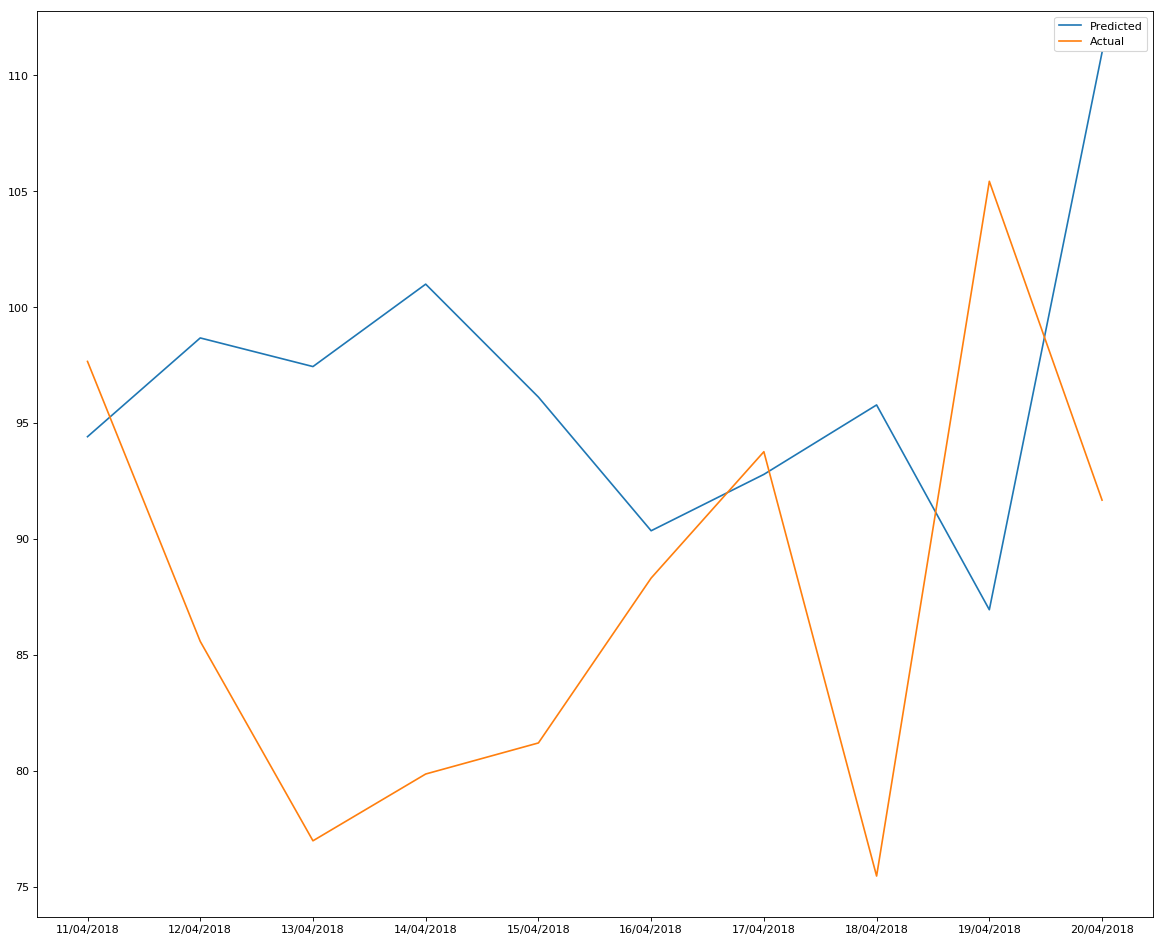

In [24]:
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()